In [2]:
!pip install minisom
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=db4700240a8ccfb00a78aab28c40ca915223dc77e2d0274a3234af7807ef3a16
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [3]:
# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

In [4]:
som = MiniSom(30, 30, 64, sigma=3, learning_rate=0.8, neighborhood_function='bubble')

som.pca_weights_init(data)
print("Training...")
som.train_random(data, 5000)  # random training
print("\n...ready!")

Training...

...ready!


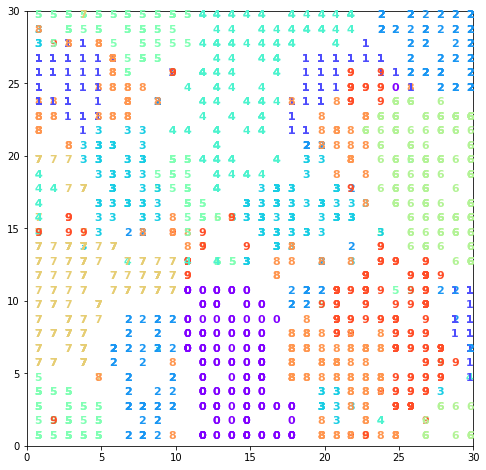

In [5]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
# plt.savefig('som_digts_30x30_gaussian_0.8lr_3sigma.png')
# print(wmap)
plt.show()

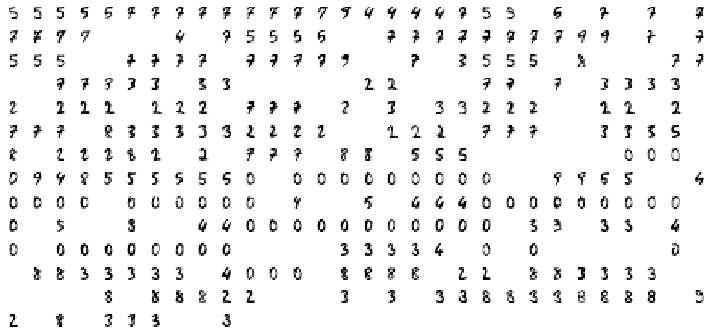

In [6]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in range(20):  # images mosaic
    for i in range(20):
        plt.subplot(30, 30, i*20 + j + 1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')

plt.tight_layout()
# plt.savefig('som_digts_imgs_30x30_gaussian_0.8lr_3sigma.png')
plt.show()